In [54]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [55]:
df=pd.read_csv('insurance_fraud.csv')


# Basics of dataset

In [56]:
df.shape

(1000, 40)

In [57]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [58]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [59]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

# Checking missing values

In [60]:
count=df.isnull().sum()
count

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [61]:
df.drop(columns=['_c39'],inplace=True)

In [62]:
df.replace('?',np.nan,inplace=True)

In [63]:
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
5                   256   39         104594       12-10-2006           OH   
6                   137   34         413978       04-06-2000           IN   
7                   165   37         429027       03-02-1990           IL   
8                    27   33         485665       05-02-1997           IL   
9                   212   42         636550       25-07-2011           IL   
10                  235   42         543610       26-05-2002           OH   
11                  447   61         214618       29-05-1999           OH   
12                   60   23         842643       20-11-1997           OH   
13                  121   34         626808       26-10-2012           OH   
14                  180   38         644081       28-12-1998           OH   
15                  473   58         892874       19-10-1992           IN   
16                   70   26         558938       08-06-2005           OH   
17                  140   31         275265       15-11-2004           IN   
18                  160   37         921202       28-12-2014           OH   
19                  196   39         143972       02-08-1992           IN   
20                  460   62         183430       25-06-2002           IN   
21                  217   41         431876       27-11-2005           IL   
22                  370   55         285496       27-05-1994           IL   
23                  413   55         115399       08-02-1991           IN   
24                  237   40         736882       02-02-1996           IN   
25                    8   35         699044       05-12-2013           OH   
26                  257   43         863236       20-09-1990           IN   
27                  202   34         608513       18-07-2002           IN   
28                  224   40         914088       08-02-1990           OH   
29                  241   45         596785       04-03-2014           IL   
30                   64   25         908616       18-02-2000           IL   
31                  166   37         666333       19-06-2008           IL   
32                  155   35         336614       01-08-2003           IL   
33                  114   30         584859       04-04-1992           IL   
34                  149   37         990493       13-01-1991           IL   
35                  147   33         129872       08-08-2010           OH   
36                   62   28         200152       09-03-2003           IL   
37                  289   49         933293       03-02-1993           IL   
38                  431   54         485664       25-11-2002           IN   
39                  199   37         982871       27-07-1997           IN   
40                   79   26         206213       08-05-1995           IL   
41                  116   34         616337       30-08-2012           IN   
42                   37   23         448961       30-04-2006           IL   
43                  106   30         790442       13-04-2003           OH   
44                  269   44         108844       05-12-2007           IL   
45                  265   40         430029       21-08-2006           IL   
46                  163   33         529112       08-01-1990           IN   
47                  355   47         939631       18-03-1990           OH   
48                  175   34         866931       07-01-2008           IN   
49                  192   35         582011       10-03-1997           IL   
50                  430   59         691189       10-01-2004           OH   
5

In [64]:
count=df.isnull().sum()
count

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

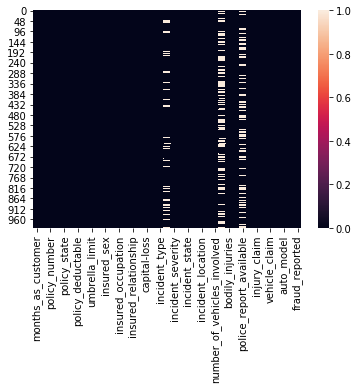

In [65]:
sns.heatmap(df.isnull())

In [66]:
df = df[df['property_damage'].notna()]

In [67]:
df = df[df['police_report_available'].notna()]

In [68]:
df = df[df['collision_type'].notna()]

In [69]:
count=df.isnull().sum()
count

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

# Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C91E973508>,
      dtype=object)

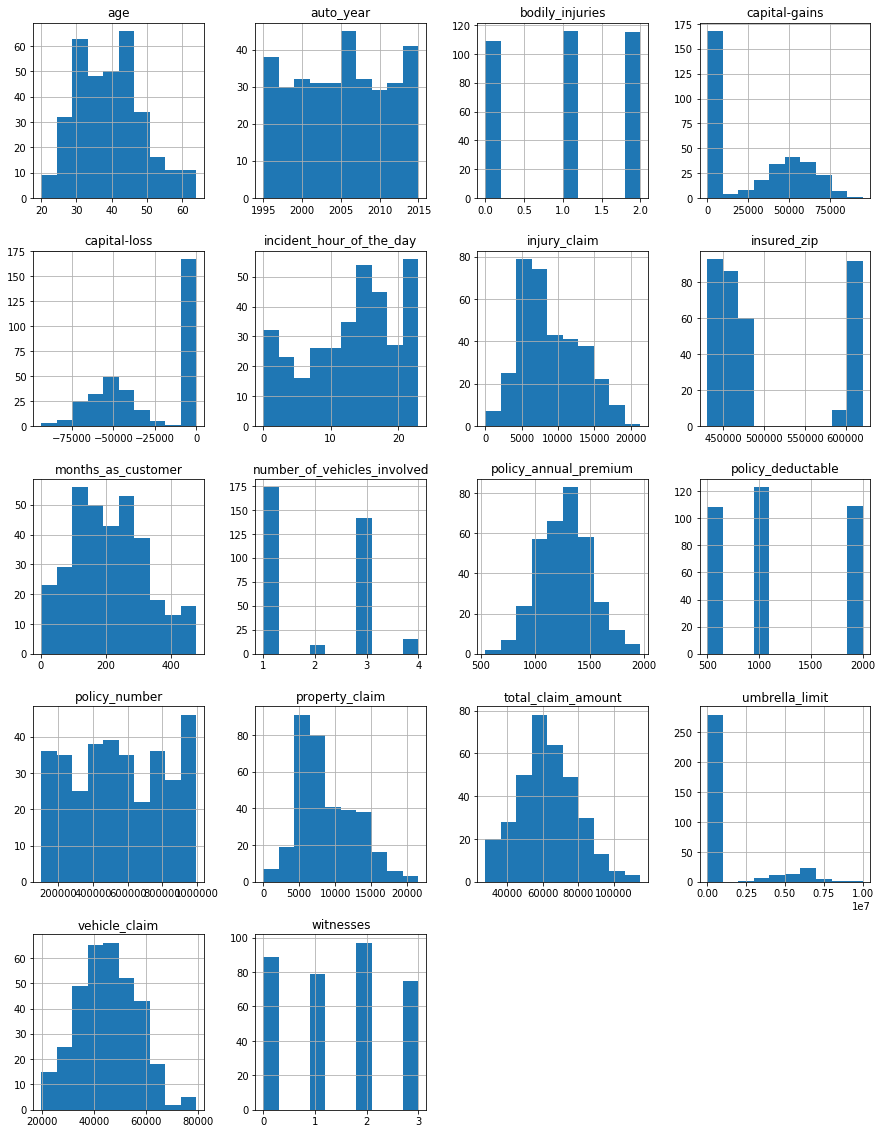

In [70]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

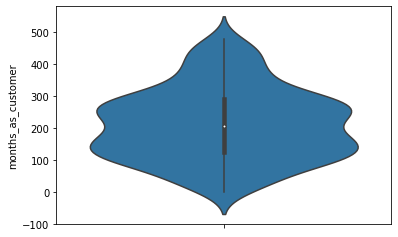

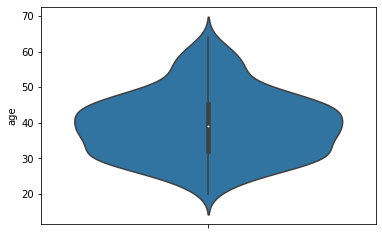

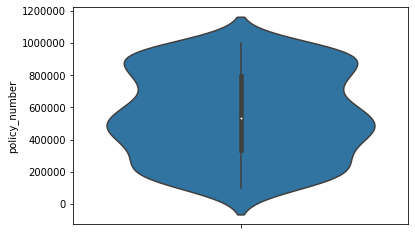

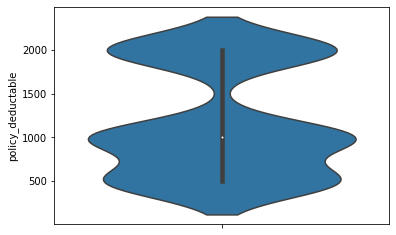

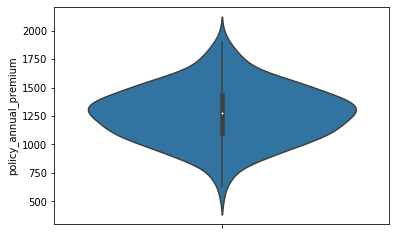

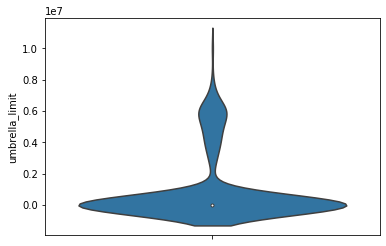

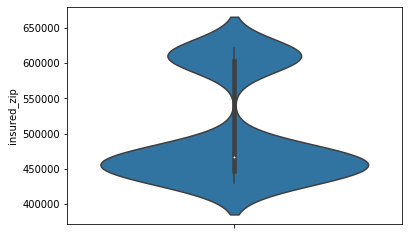

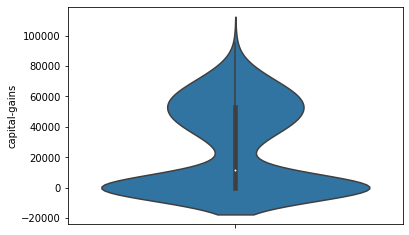

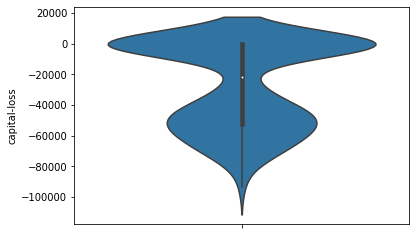

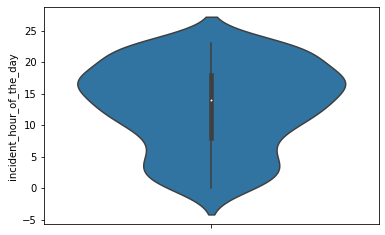

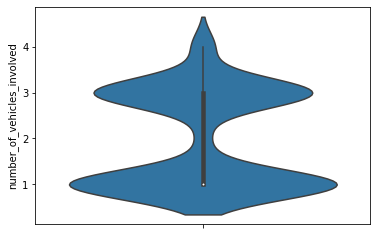

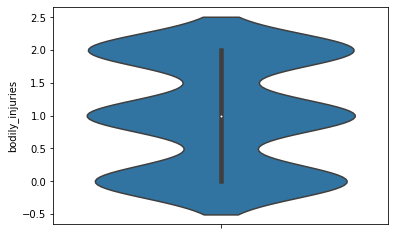

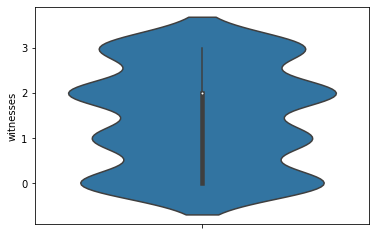

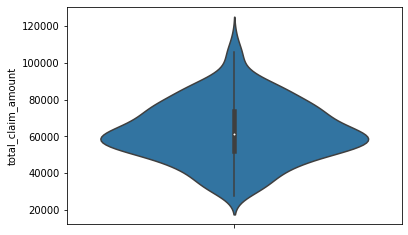

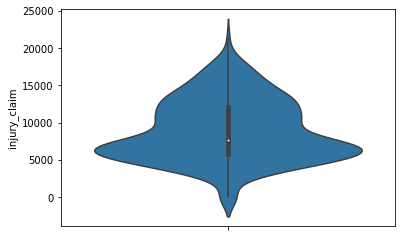

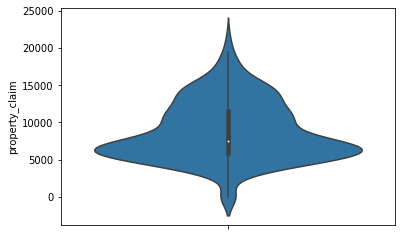

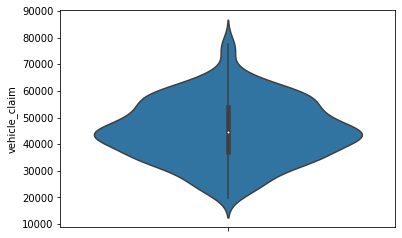

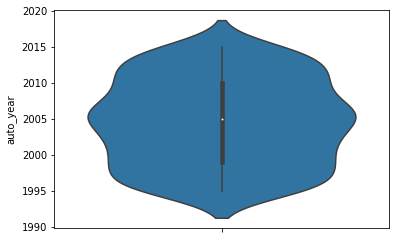

In [71]:
for i in ['months_as_customer','age','policy_number','policy_deductable','policy_annual_premium','umbrella_limit','insured_zip','capital-gains','capital-loss','incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries','witnesses','total_claim_amount','injury_claim','property_claim','vehicle_claim','auto_year']:
    sns.violinplot(y=i,data=df)
    plt.show()

# Countplot

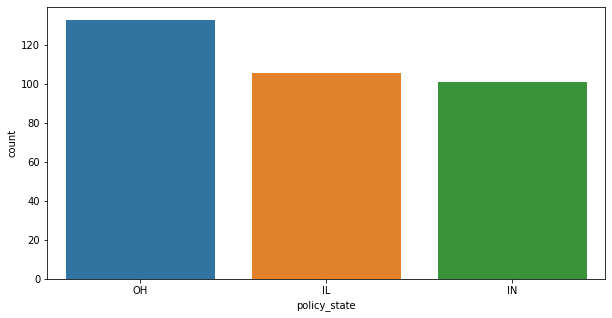

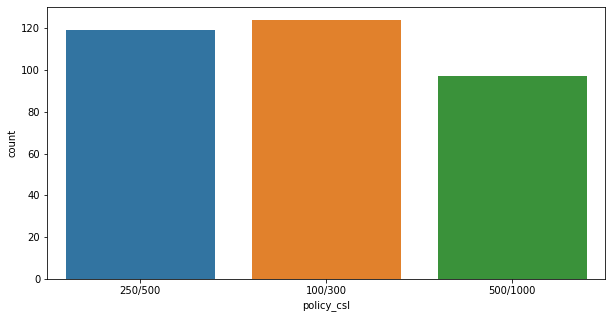

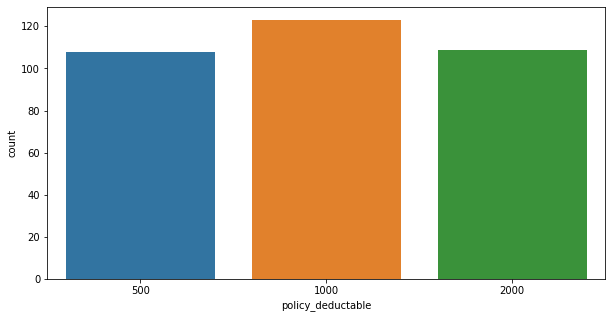

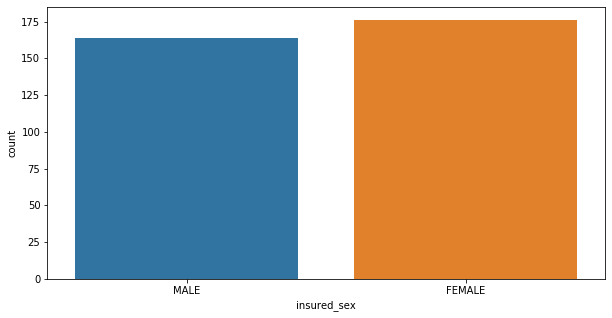

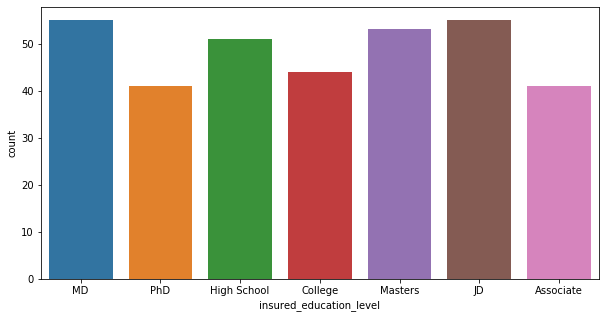

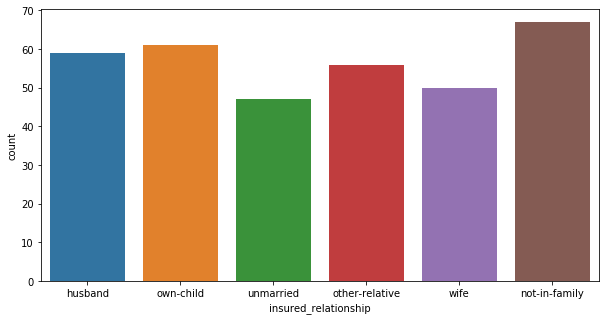

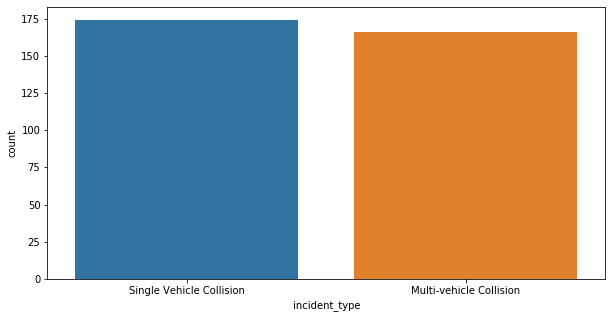

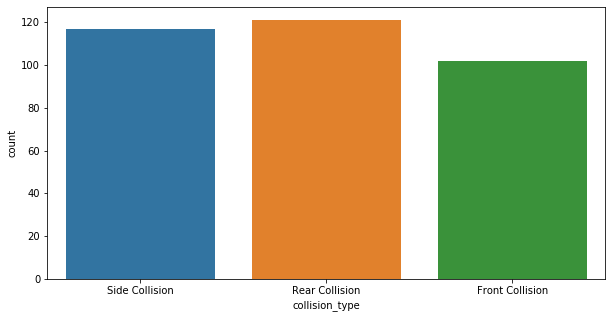

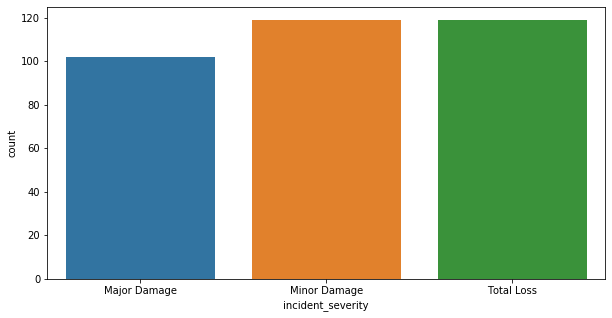

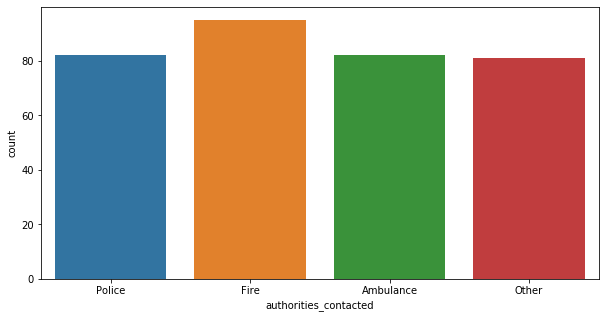

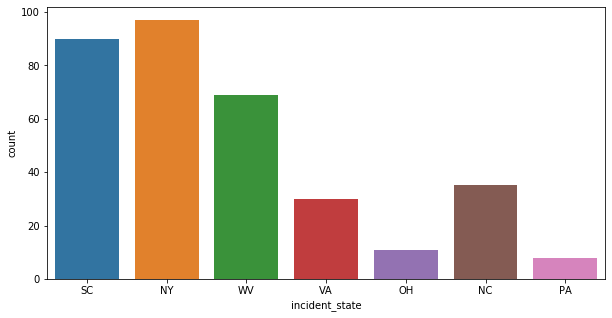

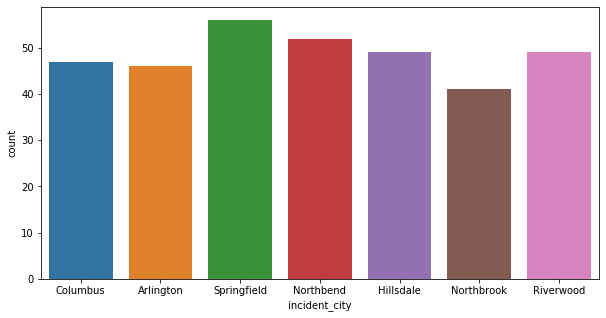

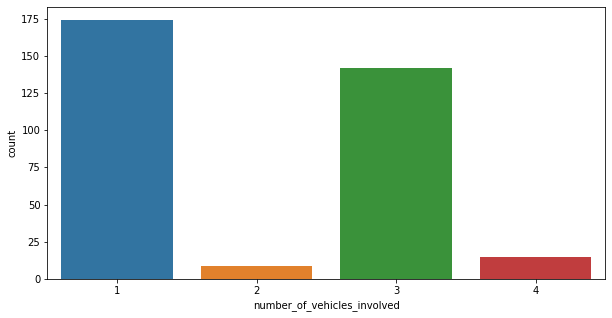

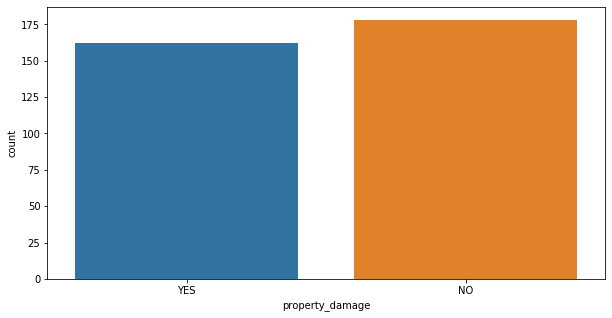

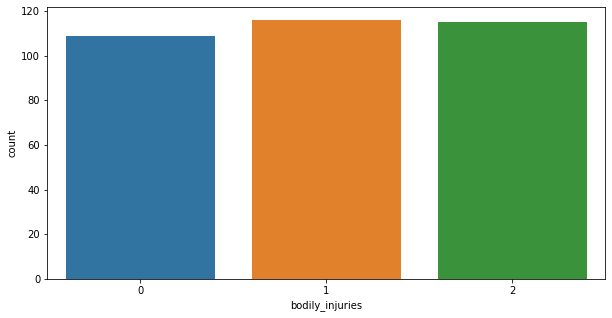

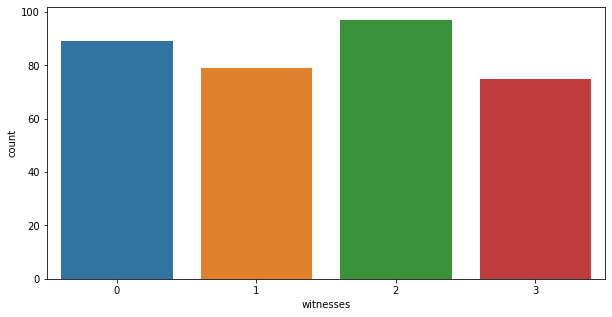

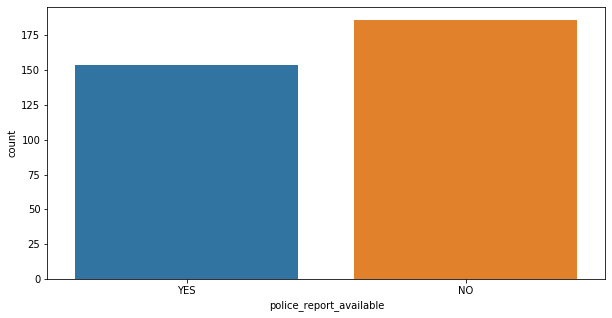

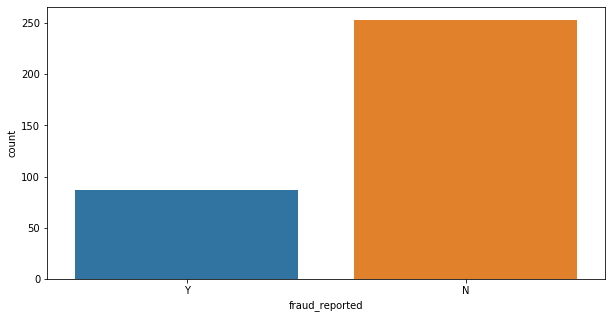

In [72]:
for i in ['policy_state','policy_csl','policy_deductable','insured_sex','insured_education_level','insured_relationship','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','number_of_vehicles_involved','property_damage','bodily_injuries','witnesses','police_report_available','fraud_reported']:
    plt.figure(figsize=(10,5))
    sns.countplot(df[i])
    plt.show()

# Catplot amongst various above columns

<Figure size 1440x360 with 0 Axes>

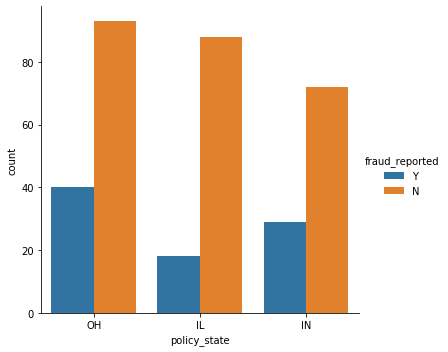

<Figure size 1440x360 with 0 Axes>

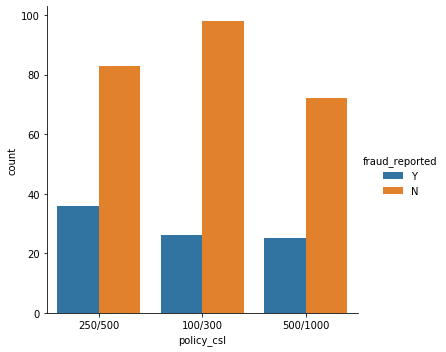

<Figure size 1440x360 with 0 Axes>

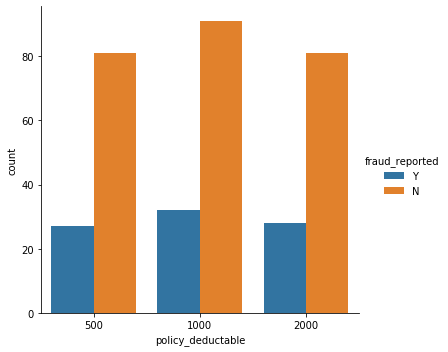

<Figure size 1440x360 with 0 Axes>

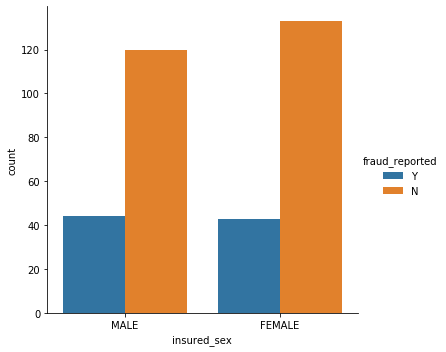

<Figure size 1440x360 with 0 Axes>

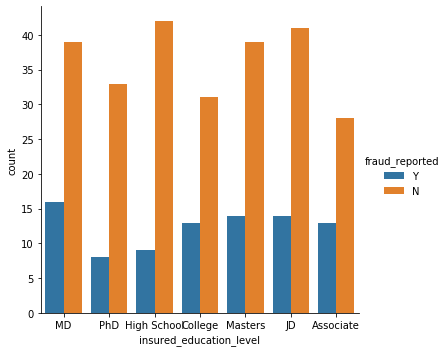

<Figure size 1440x360 with 0 Axes>

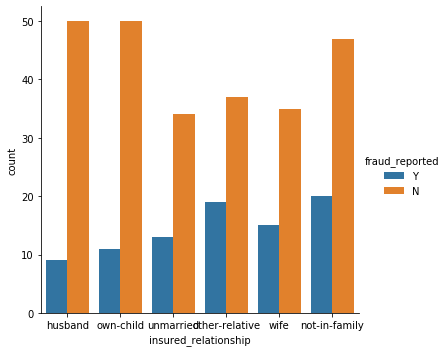

<Figure size 1440x360 with 0 Axes>

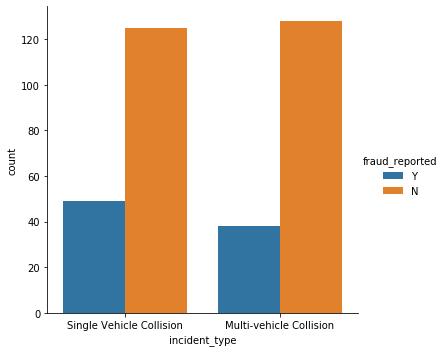

<Figure size 1440x360 with 0 Axes>

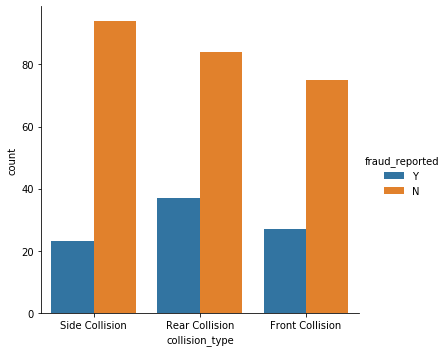

<Figure size 1440x360 with 0 Axes>

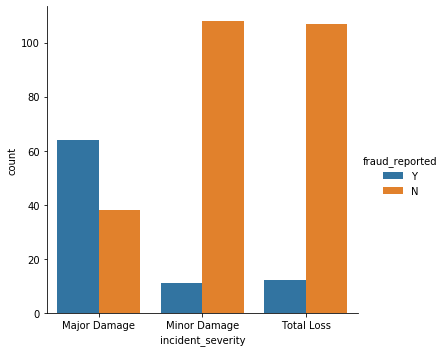

<Figure size 1440x360 with 0 Axes>

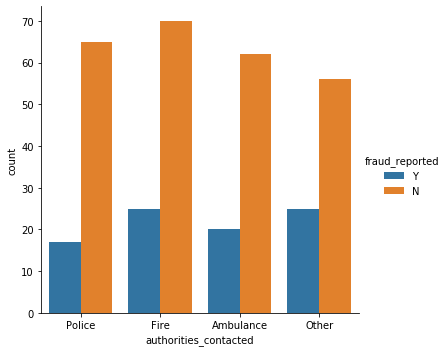

<Figure size 1440x360 with 0 Axes>

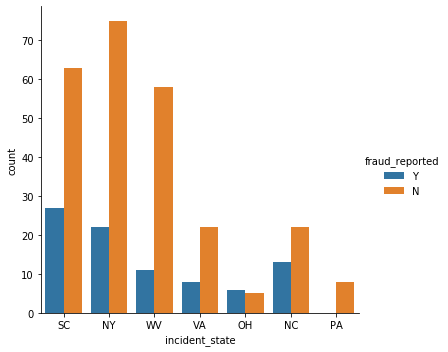

<Figure size 1440x360 with 0 Axes>

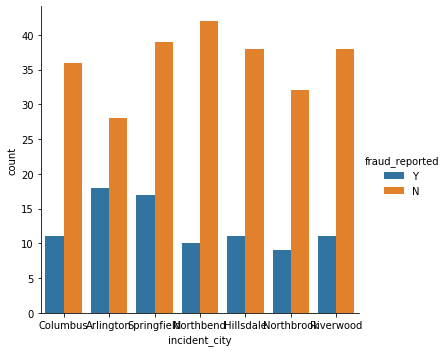

<Figure size 1440x360 with 0 Axes>

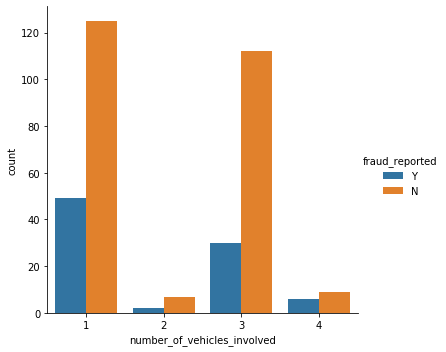

<Figure size 1440x360 with 0 Axes>

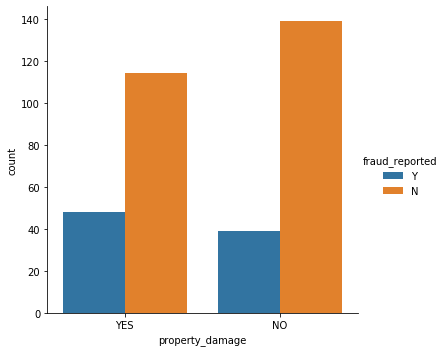

<Figure size 1440x360 with 0 Axes>

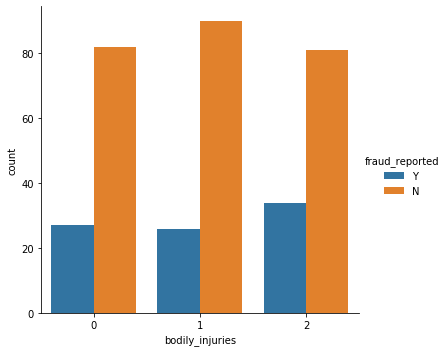

<Figure size 1440x360 with 0 Axes>

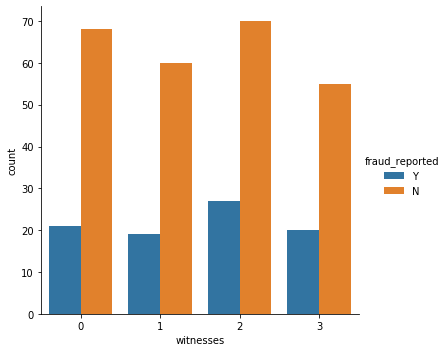

<Figure size 1440x360 with 0 Axes>

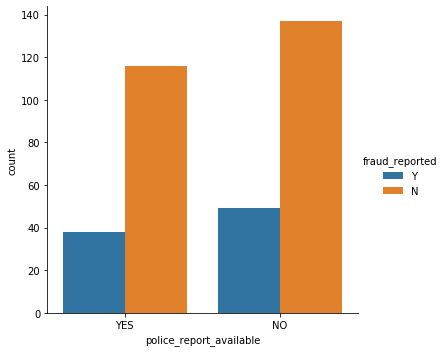

In [73]:
for i in ['policy_state','policy_csl','policy_deductable','insured_sex','insured_education_level','insured_relationship','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','number_of_vehicles_involved','property_damage','bodily_injuries','witnesses','police_report_available']:
    plt.figure(figsize=(20,5))
    sns.catplot(x=i,kind='count',hue='fraud_reported',data=df)
    plt.show()

# Using Labelencoder to transform object values into usable numeric data

In [74]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                  328   48         521585       17-10-2014           OH   
2                  134   29         687698       06-09-2000           OH   
5                  256   39         104594       12-10-2006           OH   
8                   27   33         485665       05-02-1997           IL   
11                 447   61         214618       29-05-1999           OH   

   policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0     250/500               1000                1406.91               0   
2     100/300               2000                1413.14         5000000   
5     250/500               1000                1351.10               0   
8     100/300                500                1442.99               0   
11    100/300               2000                1137.16               0   

    insured_zip insured_sex insured_education_level insured_occupation  \
0        466132        MALE                      MD       craft-repair   
2        430632      FEMALE                     PhD              sales   
5        478456      FEMALE                     PhD       tech-support   
8        601734      FEMALE                     PhD      other-service   
11       615561      FEMALE             High School    exec-managerial   

   insured_hobbies insured_relationship  capital-gains  capital-loss  \
0         sleeping              husband          53300             0   
2      board-games            own-child          35100             0   
5   bungie-jumping            unmarried              0             0   
8             golf            own-child              0             0   
11       skydiving       other-relative              0        -51000   

   incident_date             incident_type   collision_type incident_severity  \
0     25-01-2015  Single Vehicle Collision   Side Collision      Major Damage   
2     22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
5     02-01-2015   Multi-vehicle Collision   Rear Collision      Major Damage   
8     30-01-2015  Single Vehicle Collision  Front Collision        Total Loss   
11    15-02-2015   Multi-vehicle Collision  Front Collision      Major Damage   

   authorities_contacted incident_state incident_city   incident_location  \
0                 Police             SC      Columbus      9935 4th Drive   
2                 Police             NY      Columbus   7121 Francis Lane   
5                   Fire             SC     Arlington  8973 Washington St   
8                 Police             WV     Arlington     4872 Rock Ridge   
11                  Fire             SC   Springfield        5971 5th Hwy   

    incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                          5                            1             YES   
2                          7                            3              NO   
5                         19                            3              NO   
8                         21                            1              NO   
11                        21                            3             YES   

    bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                 1          2                     YES               71610   
2                 2          3                      NO               34650   
5                 0          2                      NO               64100   
8                 1          1                     YES               27700   
11                1          2                     YES              114920   

    injury_claim  property_claim  vehicle_claim auto_make auto_model  \
0           6510           13020          52080      Saab        92x   
2           7700            3850          23100     Dodge        RAM   
5           6410            6410          51280      Saab         95   
8           2770            2770          22160 

In [75]:
df.drop(columns=['policy_number','policy_bind_date','incident_date','incident_location'],inplace=True)

In [76]:
df.head()

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                  328   48           OH    250/500               1000   
2                  134   29           OH    100/300               2000   
5                  256   39           OH    250/500               1000   
8                   27   33           IL    100/300                500   
11                 447   61           OH    100/300               2000   

    policy_annual_premium  umbrella_limit  insured_zip insured_sex  \
0                 1406.91               0       466132        MALE   
2                 1413.14         5000000       430632      FEMALE   
5                 1351.10               0       478456      FEMALE   
8                 1442.99               0       601734      FEMALE   
11                1137.16               0       615561      FEMALE   

   insured_education_level insured_occupation insured_hobbies  \
0                       MD       craft-repair        sleeping   
2                      PhD              sales     board-games   
5                      PhD       tech-support  bungie-jumping   
8                      PhD      other-service            golf   
11             High School    exec-managerial       skydiving   

   insured_relationship  capital-gains  capital-loss  \
0               husband          53300             0   
2             own-child          35100             0   
5             unmarried              0             0   
8             own-child              0             0   
11       other-relative              0        -51000   

               incident_type   collision_type incident_severity  \
0   Single Vehicle Collision   Side Collision      Major Damage   
2    Multi-vehicle Collision   Rear Collision      Minor Damage   
5    Multi-vehicle Collision   Rear Collision      Major Damage   
8   Single Vehicle Collision  Front Collision        Total Loss   
11   Multi-vehicle Collision  Front Collision      Major Damage   

   authorities_contacted incident_state incident_city  \
0                 Police             SC      Columbus   
2                 Police             NY      Columbus   
5                   Fire             SC     Arlington   
8                 Police             WV     Arlington   
11                  Fire             SC   Springfield   

    incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                          5                            1             YES   
2                          7                            3              NO   
5                         19                            3              NO   
8                         21                            1              NO   
11                        21                            3             YES   

    bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                 1          2                     YES               71610   
2                 2          3                      NO               34650   
5                 0          2                      NO               64100   
8                 1          1                     YES               27700   
11                1          2                     YES              114920   

    injury_claim  property_claim  vehicle_claim auto_make auto_model  \
0           6510           13020          52080      Saab        92x   
2           7700            3850          23100     Dodge        RAM   
5           6410            6410          51280      Saab         95   
8           2770            2770          22160    Toyota      Camry   
11         17680           17680          79560      Audi         A3   

    auto_year fraud_reported  
0        2004              Y  
2        2007              N  
5        2003              Y  
8        2012              N  
11       2006              N

In [77]:
from sklearn.preprocessing import LabelEncoder

In [78]:
for i in ['policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','property_damage','police_report_available','auto_make','auto_model','auto_year','fraud_reported']:
    le=LabelEncoder()
    df[i]=le.fit_transform(df[i])


In [79]:
df.dtypes

months_as_customer               int64
age                              int64
policy_state                     int32
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                  int32
bodily_injuries                  int64
witnesses                

# Correlation matrix

In [80]:
dco=df.corr()


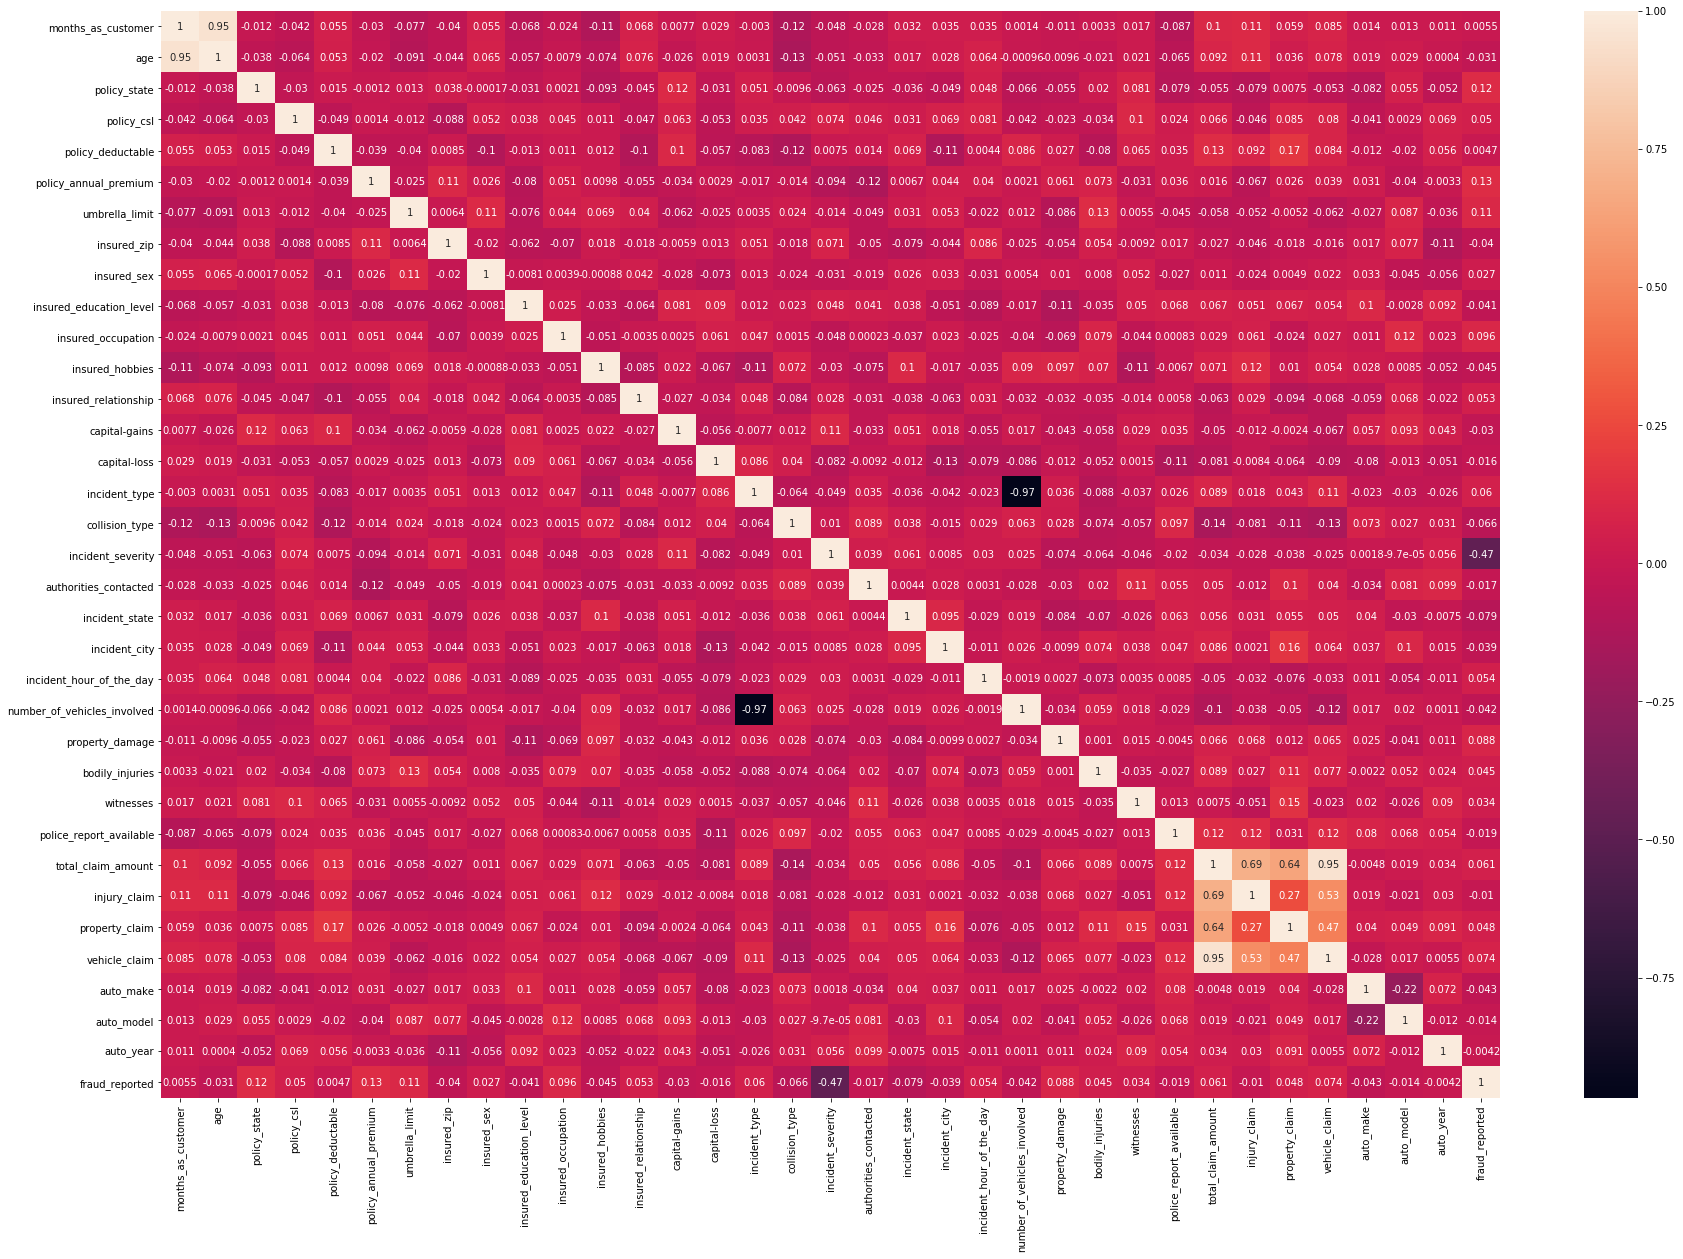

In [81]:
plt.figure(figsize=(30,20))
sns.heatmap(dco,annot=True)

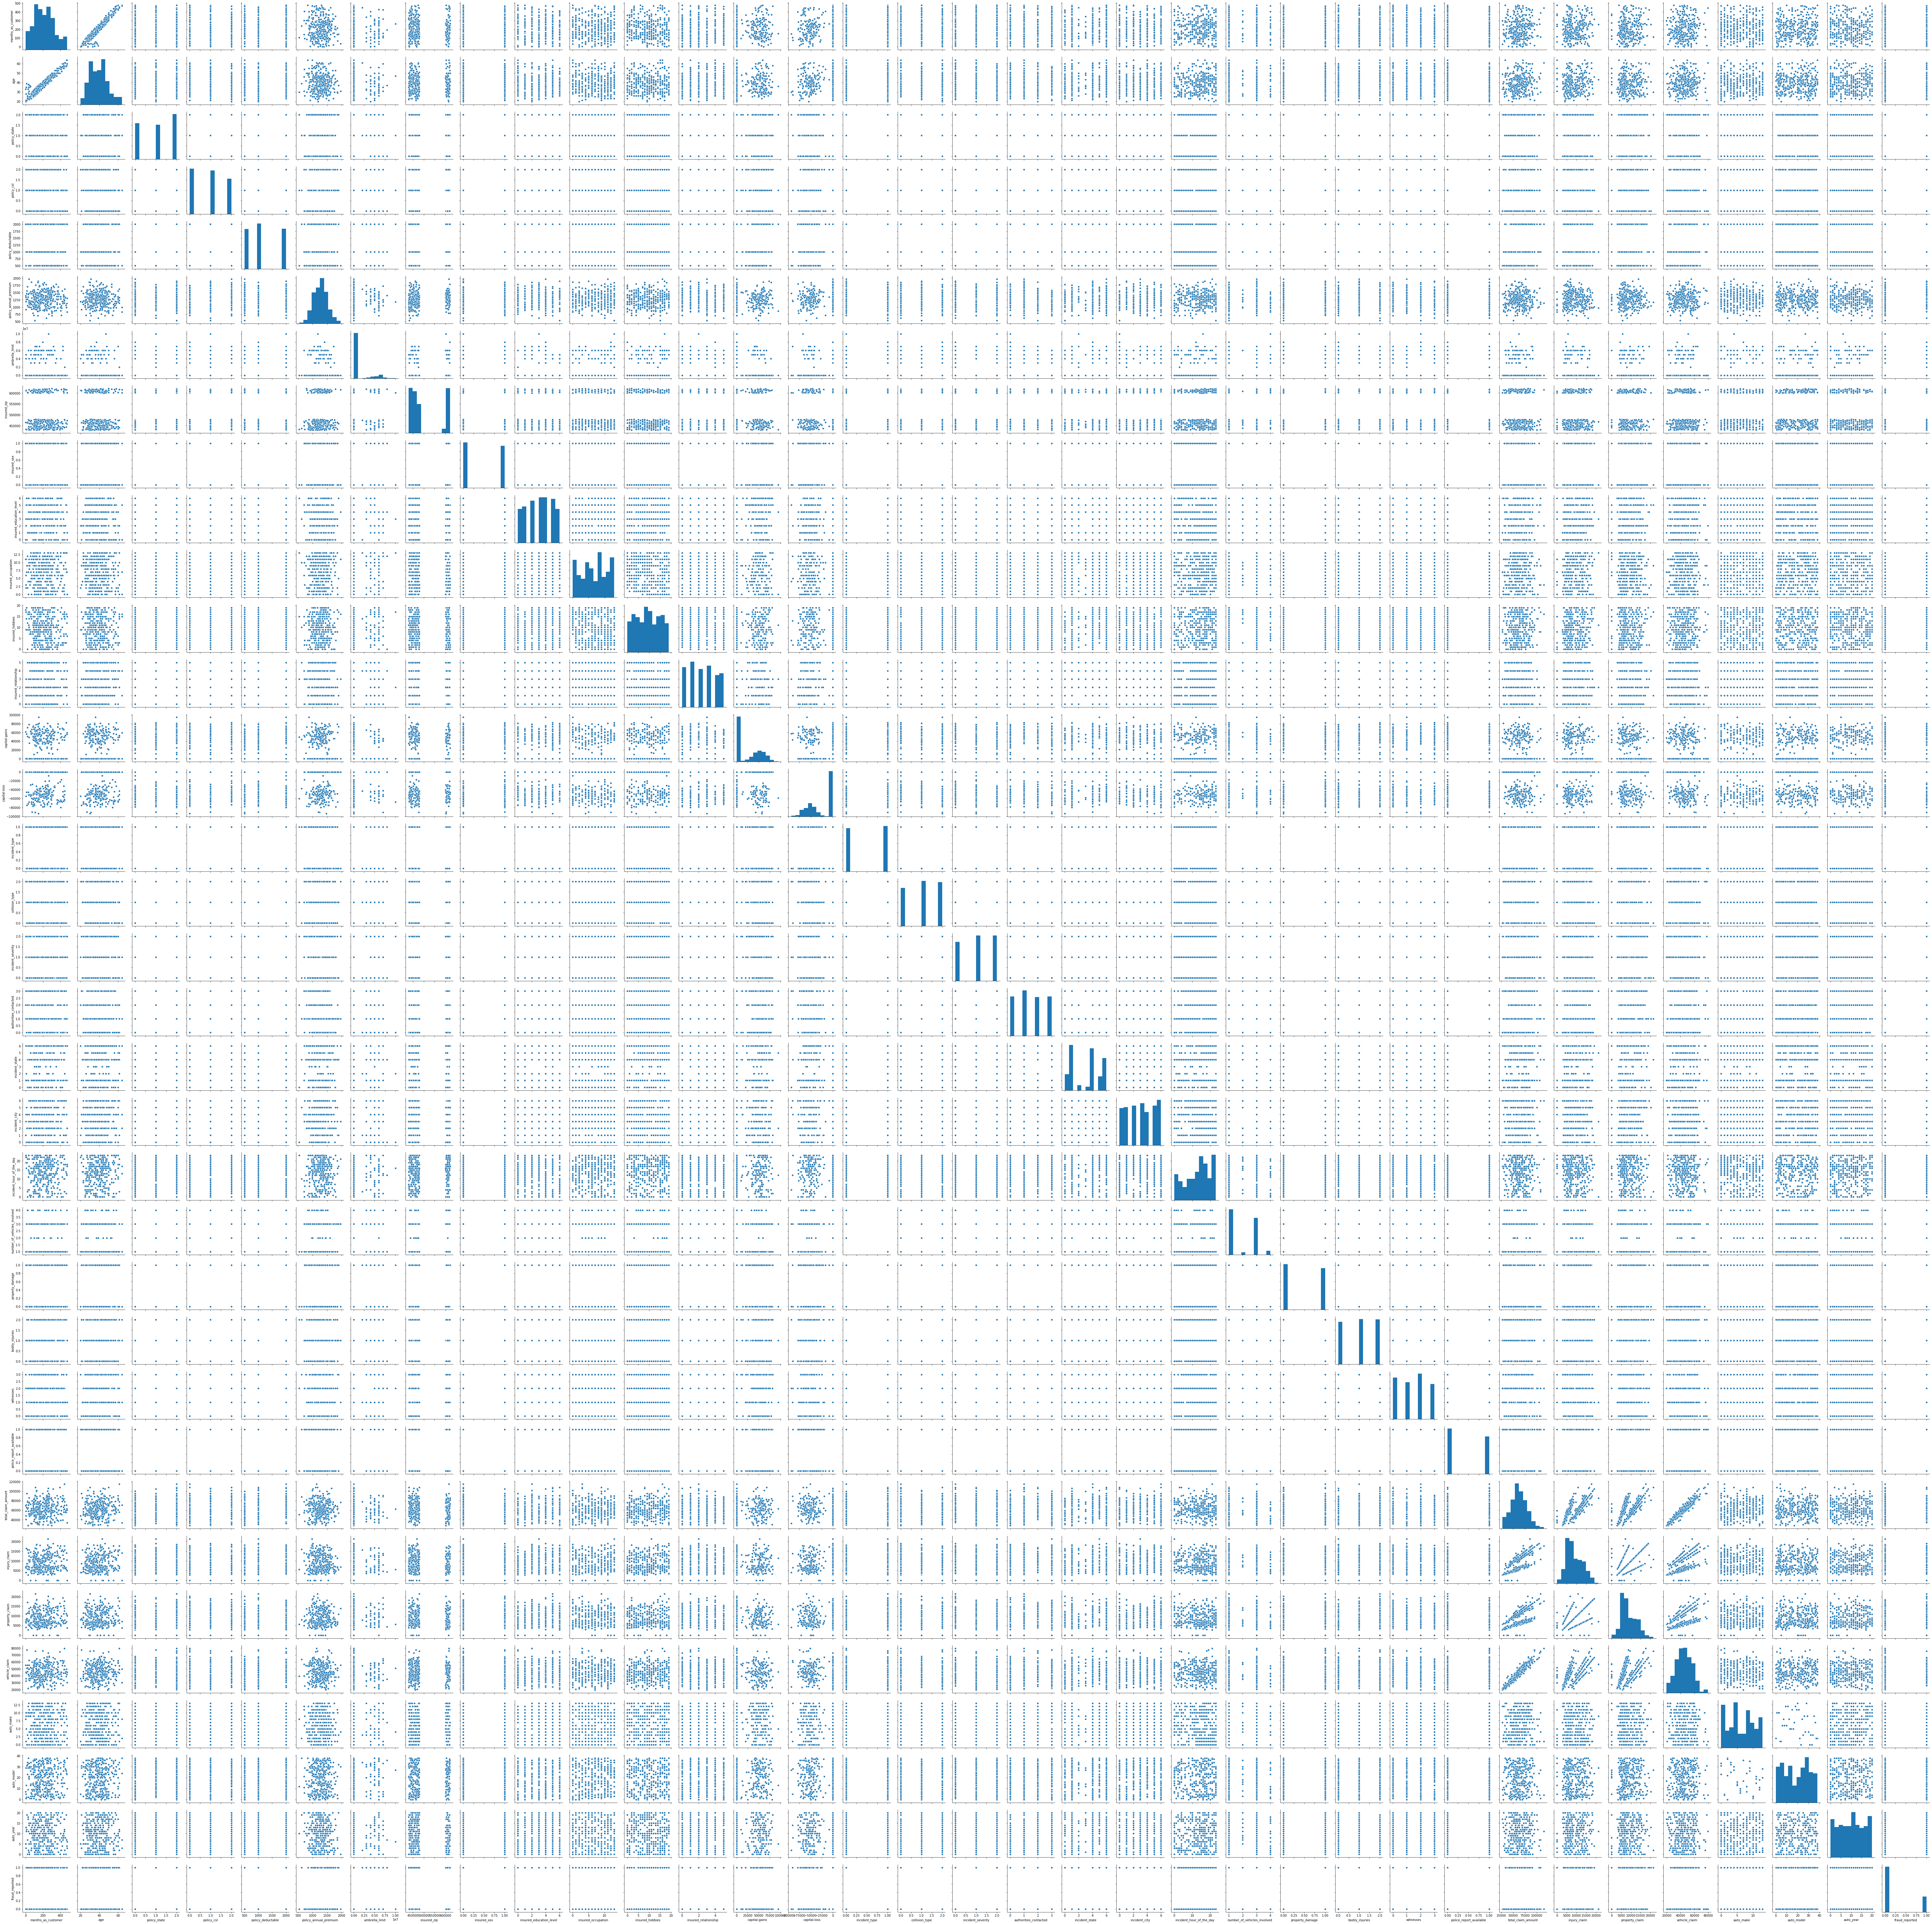

In [82]:
sns.pairplot(df)

# Statistics Summary

In [83]:
df.describe()

months_as_customer         age  policy_state  policy_csl  \
count          340.000000  340.000000    340.000000  340.000000   
mean           211.623529   39.408824      1.079412    0.920588   
std            112.779915    9.309204      0.835877    0.803488   
min              1.000000   20.000000      0.000000    0.000000   
25%            123.750000   32.000000      0.000000    0.000000   
50%            204.500000   39.000000      1.000000    1.000000   
75%            289.000000   45.250000      2.000000    2.000000   
max            479.000000   64.000000      2.000000    2.000000   

       policy_deductable  policy_annual_premium  umbrella_limit  \
count         340.000000             340.000000    3.400000e+02   
mean         1161.764706            1270.981529    9.411765e+05   
std           612.319304             245.008304    2.099883e+06   
min           500.000000             538.170000    0.000000e+00   
25%           500.000000            1101.765000    0.000000e+00   
50%          1000.000000            1274.665000    0.000000e+00   
75%          2000.000000            1437.467500    0.000000e+00   
max          2000.000000            1969.630000    1.000000e+07   

         insured_zip  insured_sex  insured_education_level  \
count     340.000000   340.000000               340.000000   
mean   501608.923529     0.482353                 3.064706   
std     71966.015133     0.500425                 1.905261   
min    430232.000000     0.000000                 0.000000   
25%    447534.500000     0.000000                 1.750000   
50%    466207.500000     0.000000                 3.000000   
75%    603018.500000     1.000000                 5.000000   
max    620869.000000     1.000000                 6.000000   

       insured_occupation  insured_hobbies  insured_relationship  \
count          340.000000       340.000000            340.000000   
mean             6.691176         9.444118              2.352941   
std              3.989135         5.624414              1.682503   
min              0.000000         0.000000              0.000000   
25%              3.000000         4.000000              1.000000   
50%              7.000000         9.000000              2.000000   
75%             10.000000        15.000000              4.000000   
max             13.000000        19.000000              5.000000   

       capital-gains  capital-loss  incident_type  collision_type  \
count     340.000000    340.000000     340.000000      340.000000   
mean    26247.352941 -26963.529412       0.511765        1.044118   
std     28165.152825  28322.980640       0.500598        0.802537   
min         0.000000 -93600.000000       0.000000        0.000000   
25%         0.000000 -52050.000000       0.000000        0.000000   
50%     11900.000000 -21650.000000       1.000000        1.000000   
75%     53025.000000      0.000000       1.000000        2.000000   
max     94800.000000      0.000000       1.000000        2.000000   

       incident_severity  authorities_contacted  incident_state  \
count          340.00000             340.000000      340.000000   
mean             1.05000               1.479412        3.138235   
std              0.80586               1.103569        2.130342   
min              0.00000               0.000000        0.000000   
25%              0.00000               1.000000        1.000000   
50%              1.00000               1.000000        4.000000   
75%              2.00000               2.000000        5.000000   
max              2.00000               3.000000        6.000000   

       incident_city  incident_hour_of_the_day  number_of_vehicles_involved  \
count     340.000000                340.000000                   340.000000   
mean        3.076471                 13.197059                     1.994118   
std         2.024927                  6.718485                     1.053143   
min         0.000000                  0.000000                     1.000000   
25%   

# Checking for skewness and outliers distribution:-

In [84]:
df.head()

months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                  328   48             2           1               1000   
2                  134   29             2           0               2000   
5                  256   39             2           1               1000   
8                   27   33             0           0                500   
11                 447   61             2           0               2000   

    policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0                 1406.91               0       466132            1   
2                 1413.14         5000000       430632            0   
5                 1351.10               0       478456            0   
8                 1442.99               0       601734            0   
11                1137.16               0       615561            0   

    insured_education_level  insured_occupation  insured_hobbies  \
0                         4                   2               17   
2                         6                  11                2   
5                         6                  12                3   
8                         6                   7                9   
11                        2                   3               16   

    insured_relationship  capital-gains  capital-loss  incident_type  \
0                      0          53300             0              1   
2                      3          35100             0              0   
5                      4              0             0              0   
8                      3              0             0              1   
11                     2              0        -51000              0   

    collision_type  incident_severity  authorities_contacted  incident_state  \
0                2                  0                      3               4   
2                1                  1                      3               1   
5                1                  0                      1               4   
8                0                  2                      3               6   
11               0                  0                      1               4   

    incident_city  incident_hour_of_the_day  number_of_vehicles_involved  \
0               1                         5                            1   
2               1                         7                            3   
5               0                        19                            3   
8               0                        21                            1   
11              6                        21                            3   

    property_damage  bodily_injuries  witnesses  police_report_available  \
0                 1                1          2                        1   
2                 0                2          3                        0   
5                 0                0          2                        0   
8                 0                1          1                        1   
11                1                1          2                        1   

    total_claim_amount  injury_claim  property_claim  vehicle_claim  \
0                71610          6510           13020          52080   
2                34650          7700            3850          23100   
5                64100          6410            6410          51280   
8                27700          2770            2770          22160   
11              114920         17680           17680          79560   

    auto_make  auto_model  auto_year  fraud_reported  
0          10           1          9               1  
2           4          30         12               0  
5          10           3          8               1  
8          12           9         17               0  
11          1           4         11               0

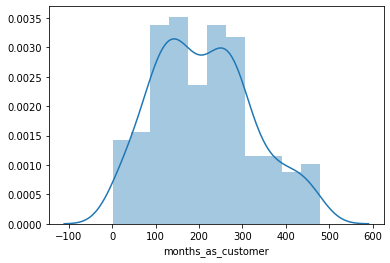

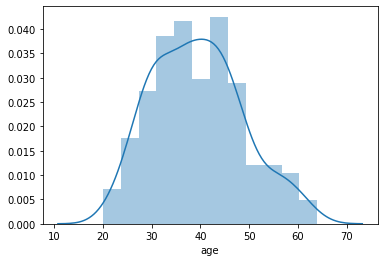

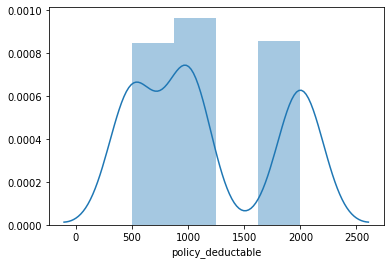

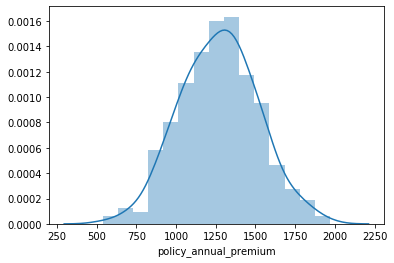

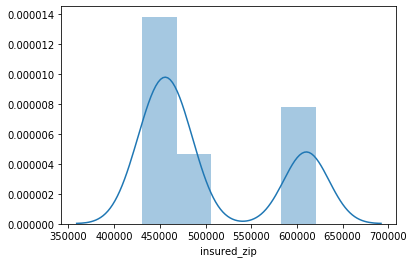

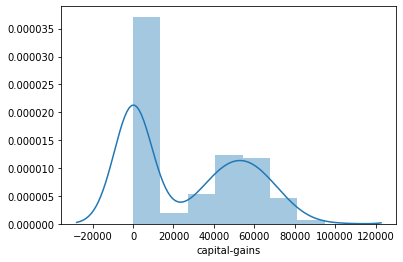

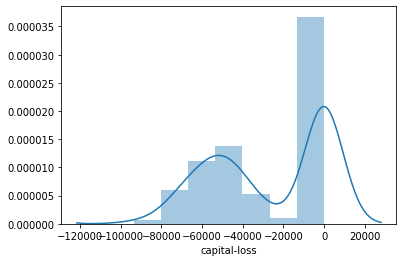

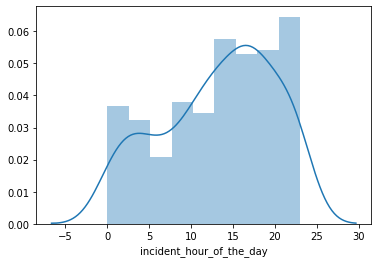

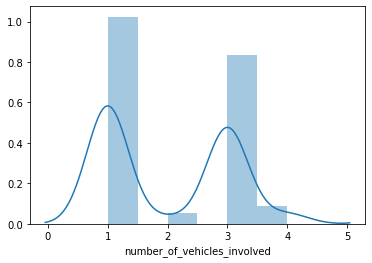

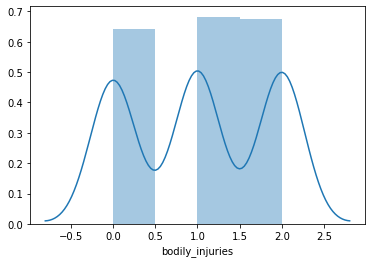

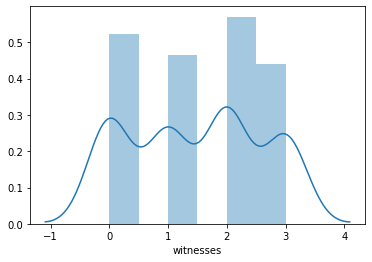

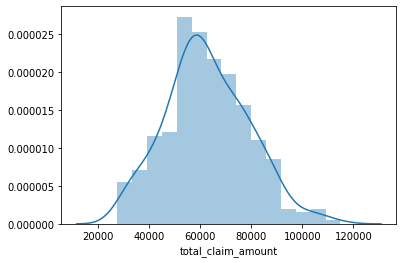

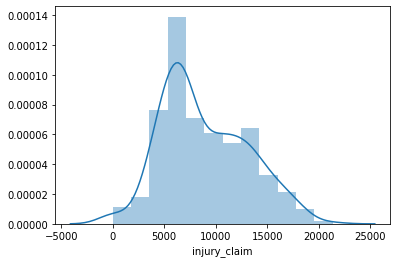

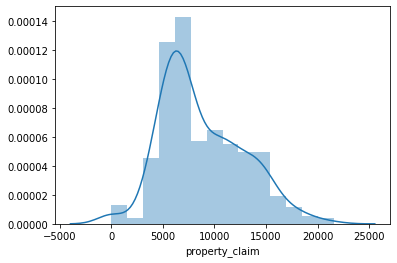

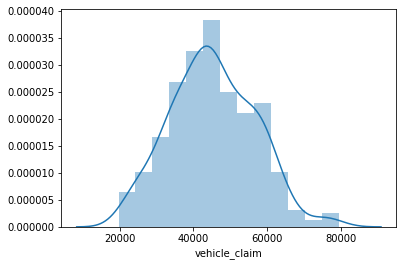

In [85]:
for i in ['months_as_customer','age','policy_deductable','policy_annual_premium','insured_zip','capital-gains','capital-loss','incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries','witnesses','total_claim_amount','injury_claim','property_claim','vehicle_claim']:
    sns.distplot(df[i])
    plt.show()
    

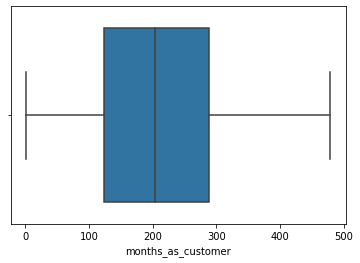

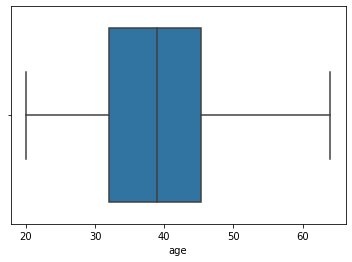

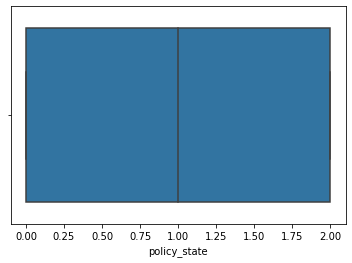

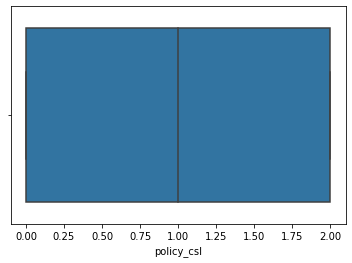

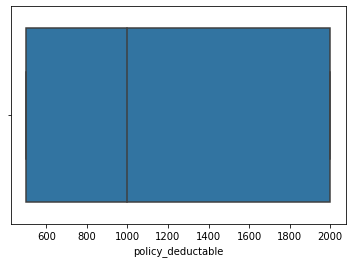

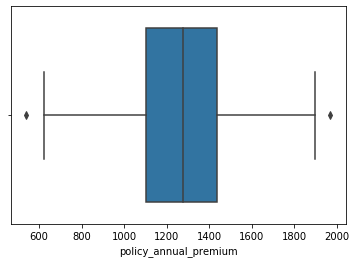

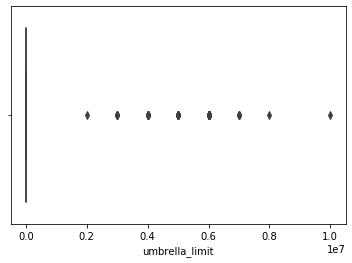

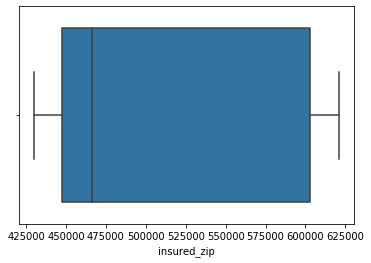

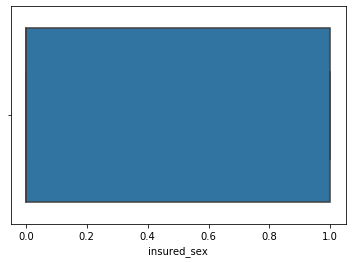

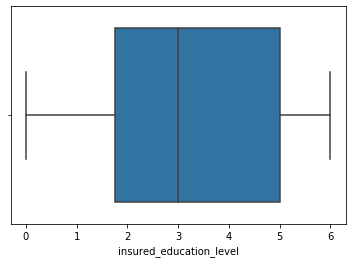

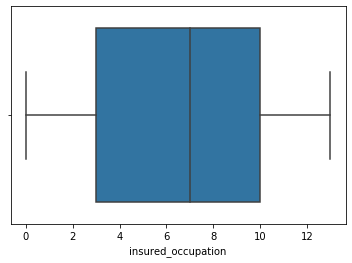

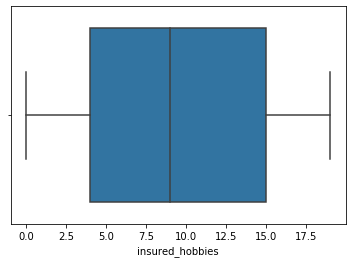

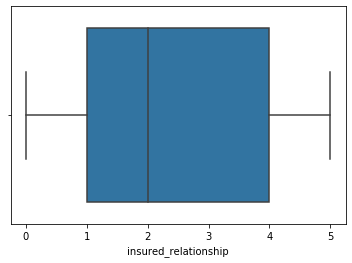

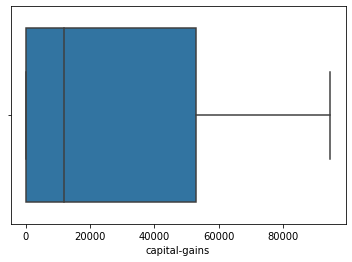

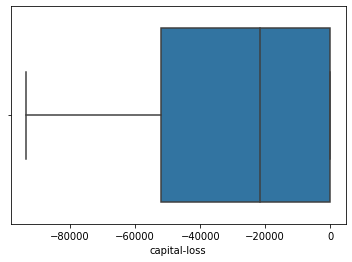

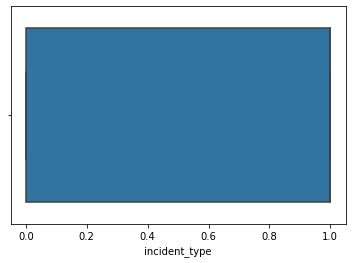

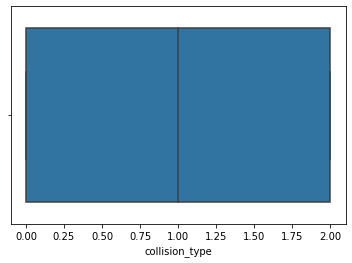

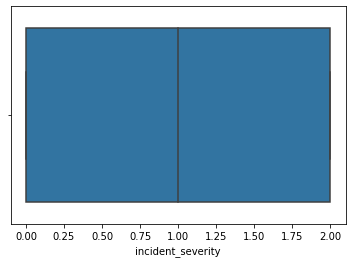

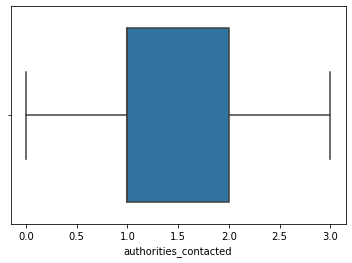

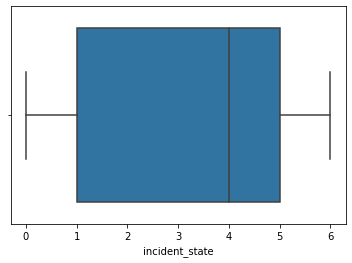

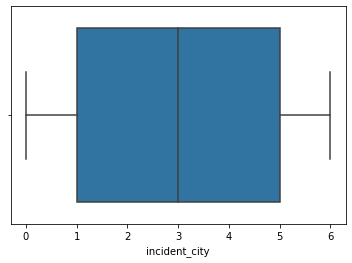

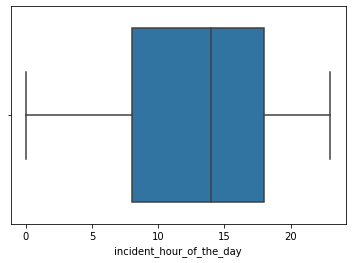

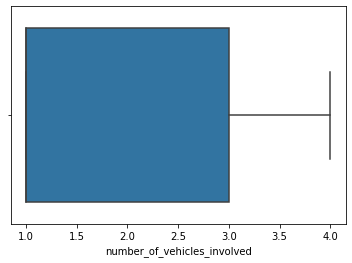

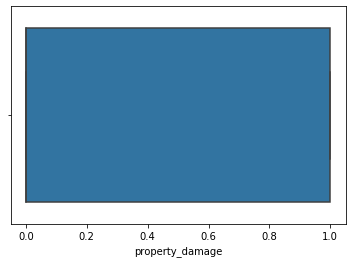

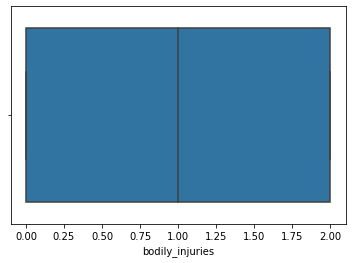

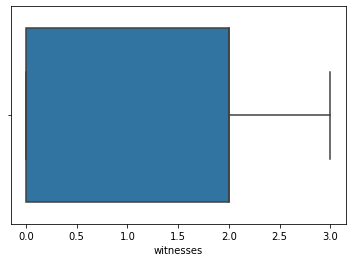

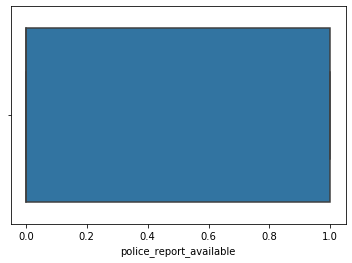

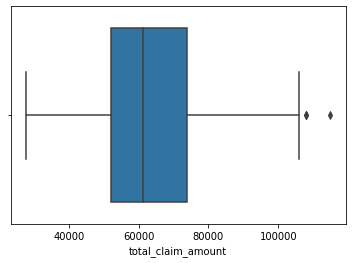

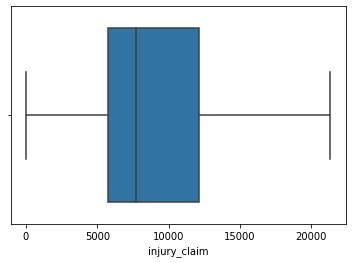

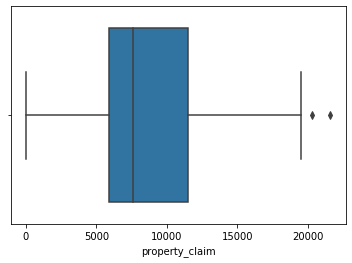

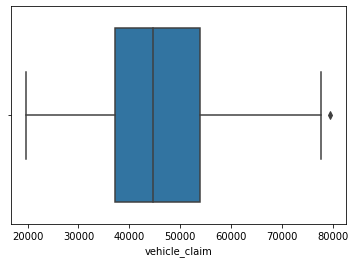

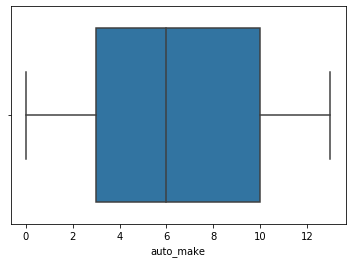

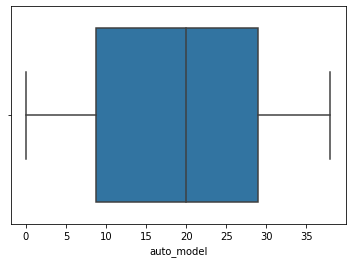

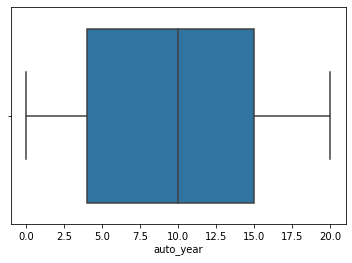

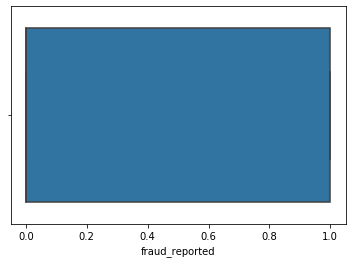

In [86]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [87]:
from scipy.stats import zscore

In [88]:
z_score=abs(zscore(df))
print(df.shape)
dffinal=df.loc[(z_score<3).all(axis=1)]
print(dffinal.shape)

(340, 35)
(335, 35)


In [89]:
dffinal.skew()

months_as_customer             0.335519
age                            0.344923
policy_state                  -0.147100
policy_csl                     0.135779
policy_deductable              0.425114
policy_annual_premium          0.004679
umbrella_limit                 1.928420
insured_zip                    0.823065
insured_sex                    0.053993
insured_education_level       -0.064955
insured_occupation            -0.085736
insured_hobbies                0.043557
insured_relationship           0.129981
capital-gains                  0.370120
capital-loss                  -0.335034
incident_type                 -0.041988
collision_type                -0.091786
incident_severity             -0.097453
authorities_contacted          0.041005
incident_state                -0.042776
incident_city                 -0.020690
incident_hour_of_the_day      -0.382909
number_of_vehicles_involved    0.230734
property_damage                0.102081
bodily_injuries               -0.038358


In [90]:
xn=dffinal.drop(columns=['fraud_reported'])
yn=dffinal['fraud_reported']

In [91]:
for col in xn.columns:
    if xn.skew().loc[col]>0.55:
        xn[col]=np.log1p(xn[col])

In [92]:
xn.skew()

months_as_customer             0.335519
age                            0.344923
policy_state                  -0.147100
policy_csl                     0.135779
policy_deductable              0.425114
policy_annual_premium          0.004679
umbrella_limit                 1.709614
insured_zip                    0.788005
insured_sex                    0.053993
insured_education_level       -0.064955
insured_occupation            -0.085736
insured_hobbies                0.043557
insured_relationship           0.129981
capital-gains                  0.370120
capital-loss                  -0.335034
incident_type                 -0.041988
collision_type                -0.091786
incident_severity             -0.097453
authorities_contacted          0.041005
incident_state                -0.042776
incident_city                 -0.020690
incident_hour_of_the_day      -0.382909
number_of_vehicles_involved    0.230734
property_damage                0.102081
bodily_injuries               -0.038358


# Now,scaling of data has to be done

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
scale=StandardScaler()
xn=scale.fit_transform(xn)


In [95]:
xd=pd.DataFrame(xn)

In [96]:
xd.skew()

0     0.335519
1     0.344923
2    -0.147100
3     0.135779
4     0.425114
5     0.004679
6     1.709614
7     0.788005
8     0.053993
9    -0.064955
10   -0.085736
11    0.043557
12    0.129981
13    0.370120
14   -0.335034
15   -0.041988
16   -0.091786
17   -0.097453
18    0.041005
19   -0.042776
20   -0.020690
21   -0.382909
22    0.230734
23    0.102081
24   -0.038358
25    0.000657
26    0.198869
27    0.185474
28    0.376799
29    0.488610
30    0.108703
31    0.036462
32   -0.001998
33    0.020180
dtype: float64

In [97]:
xd.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
dtype: int64

# Splitting the dataset at 20%

In [98]:
xtrain,xtest,ytrain,ytest=train_test_split(xd,yn,test_size=.20,random_state=42)

In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals import joblib

In [100]:
print(xtrain.shape,xtest.shape)

(268, 34) (67, 34)


In [101]:
print(ytrain.shape,ytest.shape)

(268,) (67,)


In [102]:
def maxacc_score(regr,xd,yn):
    max_ac_score=0
    for r_state in range(42,100):
        xtrain,xtest,ytrain,ytest=train_test_split(xd,yn,test_size=.20,random_state=r_state)
        regr.fit(xtrain,ytrain)
        ypred=regr.predict(xtest)
        acc_scr=accuracy_score(ytest,ypred)
        print('acc score corresponding to ',r_state,'is',acc_scr)
        if acc_scr> max_ac_score:
            max_ac_score= acc_scr
            finalrstate=r_state
    print('max acc score corresponding to',finalrstate,'is',max_ac_score)
    return finalrstate

In [103]:
lr = LogisticRegression()
svc = SVC(probability=True)
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
rfc=RandomForestClassifier()
gbc=GradientBoostingClassifier()
ada=AdaBoostClassifier()

parameters={'C': [ 10, 1.0, 0.1, 0.01]}
clf=GridSearchCV(lr,parameters)
clf.fit(xd,yn)
print('best LR parameters is :',clf.best_params_)
print('\n')
parameters={'C': [100, 10, 1.0, 0.1,0.01],'kernel':['poly', 'rbf']}
clf=GridSearchCV(svc,parameters)
clf.fit(xd,yn)
print('best SVC parameters is :',clf.best_params_)
print('\n')
parameters={'criterion':['gini', 'entropy']}
clf=GridSearchCV(dtc,parameters)
clf.fit(xd,yn)
print('best DTC parameters is :',clf.best_params_)
print('\n')
parameters={'n_neighbors':range(1,30)}
clf=GridSearchCV(knc,parameters)
clf.fit(xd,yn)
print('best KNC parameters is :',clf.best_params_)
print('\n')
parameters={'n_estimators':[50,100,150,200,250,300]}
clf=GridSearchCV(rfc,parameters,cv=5)
clf.fit(xd,yn)
print('best RFC parameters is :',clf.best_params_)
print('\n')
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[50,100,150,200,250,300]}
clf=GridSearchCV(gbc,parameters,cv=5)
clf.fit(xd,yn)
print('best GBC parameters is :',clf.best_params_)
print('\n')
parameters={'learning_rate':[0.01,0.1,1],'n_estimators':[50,100,150,200,250,300],'base_estimator':[lr,dtc]}
clf=GridSearchCV(ada,parameters,cv=5)
clf.fit(xd,yn)
print('best ADACLASS parameters is :',clf.best_params_)
print('\n')

best LR parameters is : {'C': 10}


best SVC parameters is : {'C': 100, 'kernel': 'poly'}


best DTC parameters is : {'criterion': 'entropy'}


best KNC parameters is : {'n_neighbors': 11}


best RFC parameters is : {'n_estimators': 100}


best GBC parameters is : {'learning_rate': 0.1, 'n_estimators': 150}


best ADACLASS parameters is : {'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'), 'learning_rate': 0.1, 'n_estimators': 100}




In [104]:
gn=GaussianNB()
r_state=maxacc_score(gn,xd,yn)
print('\n')
svc=SVC(C=100,kernel='poly')
r_state=maxacc_score(svc,xd,yn)
print('\n')
lr = LogisticRegression(C=10)
r_state=maxacc_score(lr,xd,yn)
print('\n')
dtc=DecisionTreeClassifier(criterion='entropy')
r_state=maxacc_score(dtc,xd,yn)
print('\n')
knc=KNeighborsClassifier(n_neighbors= 11)
r_state=maxacc_score(knc,xd,yn)
print('\n')
rfc=RandomForestClassifier(n_estimators=100)
r_state=maxacc_score(rfc,xd,yn)
print('\n')
gbc=GradientBoostingClassifier(learning_rate=0.1,n_estimators=150)
r_state=maxacc_score(gbc,xd,yn)
print('\n')
adareg=AdaBoostClassifier(learning_rate=0.1,n_estimators=100,base_estimator=dtc)
r_state=maxacc_score(ada,xd,yn)
print('\n')

acc score corresponding to  42 is 0.7313432835820896
acc score corresponding to  43 is 0.8208955223880597
acc score corresponding to  44 is 0.8656716417910447
acc score corresponding to  45 is 0.7313432835820896
acc score corresponding to  46 is 0.7910447761194029
acc score corresponding to  47 is 0.7611940298507462
acc score corresponding to  48 is 0.6716417910447762
acc score corresponding to  49 is 0.7910447761194029
acc score corresponding to  50 is 0.746268656716418
acc score corresponding to  51 is 0.746268656716418
acc score corresponding to  52 is 0.7611940298507462
acc score corresponding to  53 is 0.7164179104477612
acc score corresponding to  54 is 0.7611940298507462
acc score corresponding to  55 is 0.7313432835820896
acc score corresponding to  56 is 0.7761194029850746
acc score corresponding to  57 is 0.746268656716418
acc score corresponding to  58 is 0.746268656716418
acc score corresponding to  59 is 0.7164179104477612
acc score corresponding to  60 is 0.80597014925373

acc score corresponding to  84 is 0.7611940298507462
acc score corresponding to  85 is 0.6865671641791045
acc score corresponding to  86 is 0.8208955223880597
acc score corresponding to  87 is 0.7313432835820896
acc score corresponding to  88 is 0.7910447761194029
acc score corresponding to  89 is 0.7014925373134329
acc score corresponding to  90 is 0.746268656716418
acc score corresponding to  91 is 0.7313432835820896
acc score corresponding to  92 is 0.7761194029850746
acc score corresponding to  93 is 0.7164179104477612
acc score corresponding to  94 is 0.7313432835820896
acc score corresponding to  95 is 0.8059701492537313
acc score corresponding to  96 is 0.7611940298507462
acc score corresponding to  97 is 0.835820895522388
acc score corresponding to  98 is 0.7761194029850746
acc score corresponding to  99 is 0.8059701492537313
max acc score corresponding to 63 is 0.8507462686567164


acc score corresponding to  42 is 0.835820895522388
acc score corresponding to  43 is 0.76119402

acc score corresponding to  62 is 0.7910447761194029
acc score corresponding to  63 is 0.8955223880597015
acc score corresponding to  64 is 0.835820895522388
acc score corresponding to  65 is 0.7910447761194029
acc score corresponding to  66 is 0.7313432835820896
acc score corresponding to  67 is 0.7611940298507462
acc score corresponding to  68 is 0.7910447761194029
acc score corresponding to  69 is 0.7164179104477612
acc score corresponding to  70 is 0.8059701492537313
acc score corresponding to  71 is 0.7910447761194029
acc score corresponding to  72 is 0.7611940298507462
acc score corresponding to  73 is 0.746268656716418
acc score corresponding to  74 is 0.8208955223880597
acc score corresponding to  75 is 0.7761194029850746
acc score corresponding to  76 is 0.7910447761194029
acc score corresponding to  77 is 0.7611940298507462
acc score corresponding to  78 is 0.7910447761194029
acc score corresponding to  79 is 0.8059701492537313
acc score corresponding to  80 is 0.731343283582

In [105]:
models=[]
models.append(('GNB',gn))
models.append(('SVC',svc))
models.append(('LogisticRegression',lr))
models.append(('DTC',dtc))
models.append(('kNeighborsClassifier',knc))
models.append(('RFC',rfc))
models.append(('GBC',gbc))
models.append(('ADACLASS',ada))

In [106]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import cross_val_score

****,name,****


GaussianNB(priors=None, var_smoothing=1e-09)


accuracy score 0.7313432835820896


Cross val score 0.7791044776119402


roc_auc score 0.5661764705882353


classification report
               precision    recall  f1-score   support

           0       0.79      0.88      0.83        51
           1       0.40      0.25      0.31        16

    accuracy                           0.73        67
   macro avg       0.59      0.57      0.57        67
weighted avg       0.70      0.73      0.71        67



[[45  6]
 [12  4]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



****,name,****


SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


accuracy score 0.7611940298507462


Cross val score 0.755223880597015


roc_auc score 0.5


classification report
               precision 

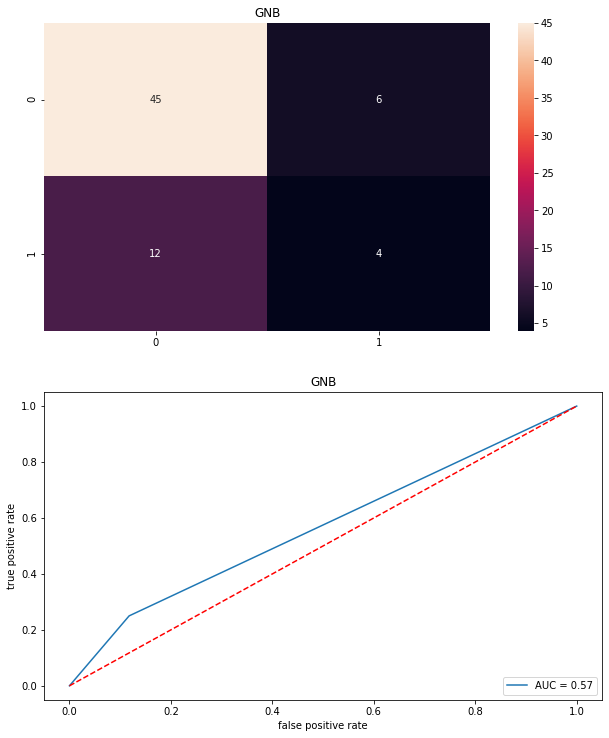

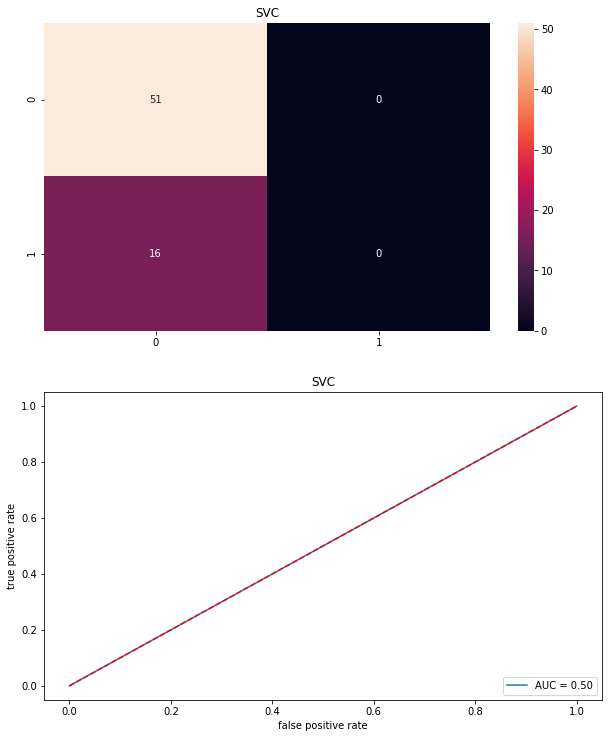

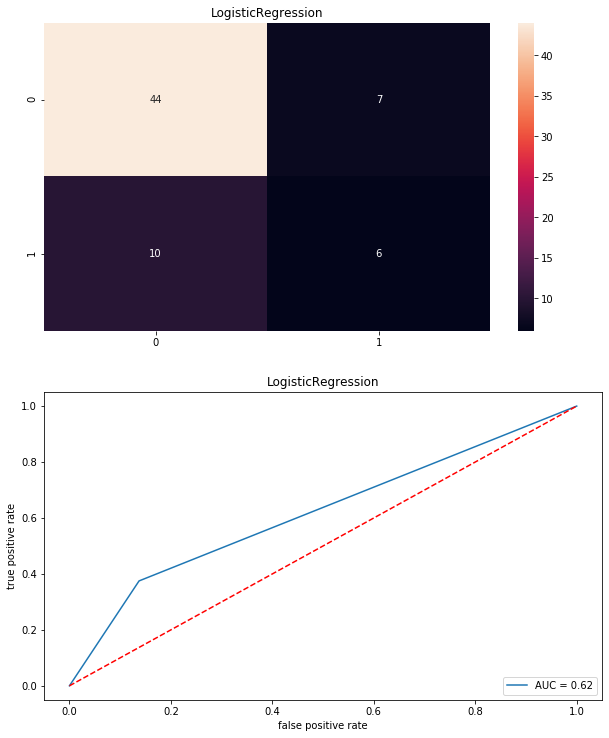

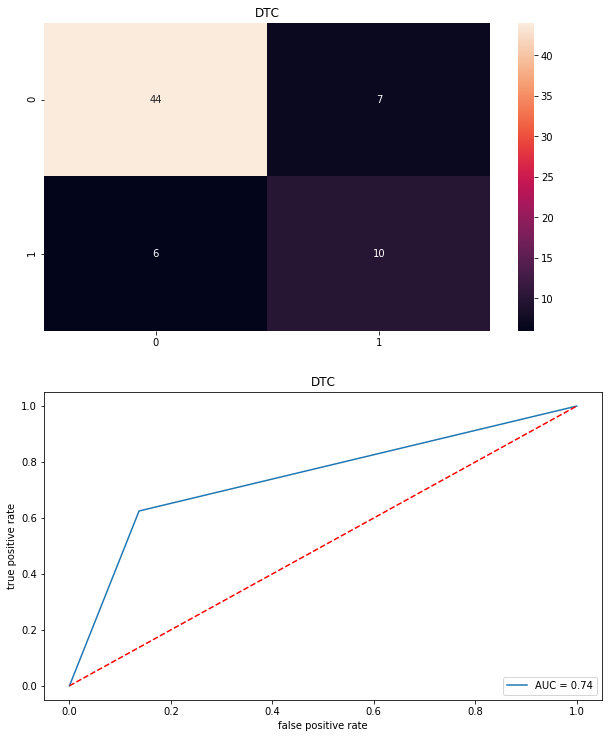

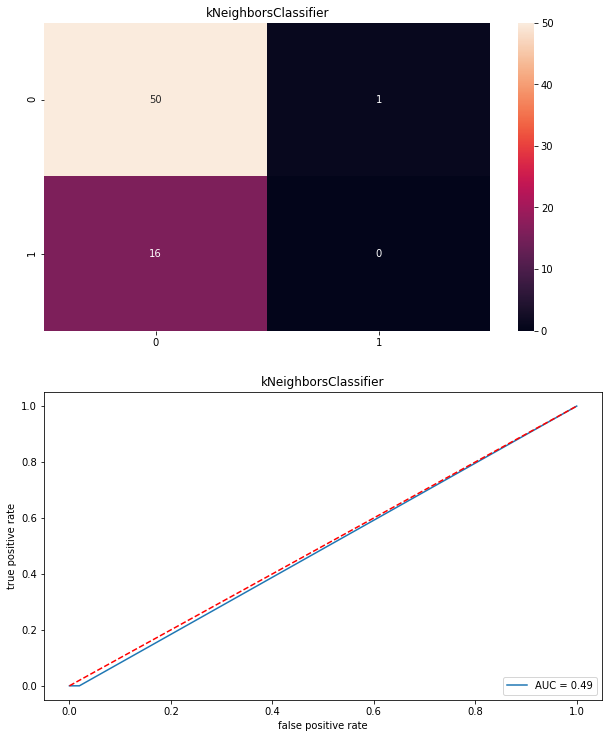

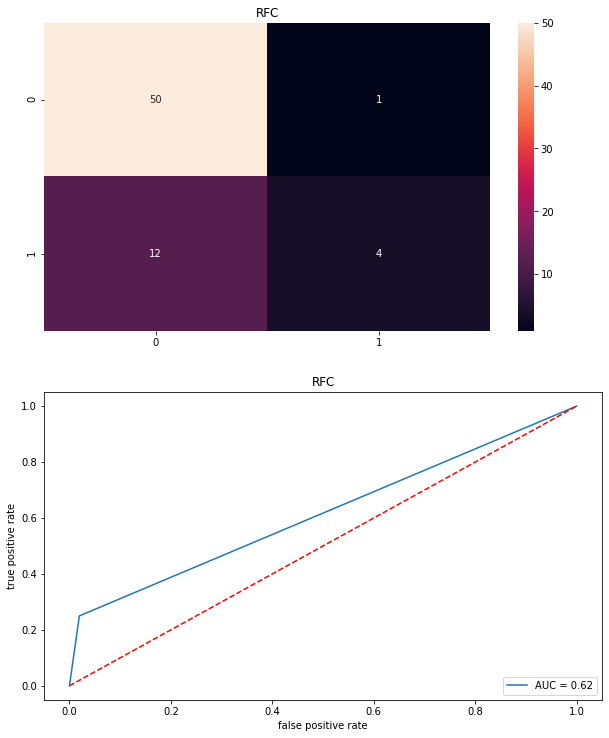

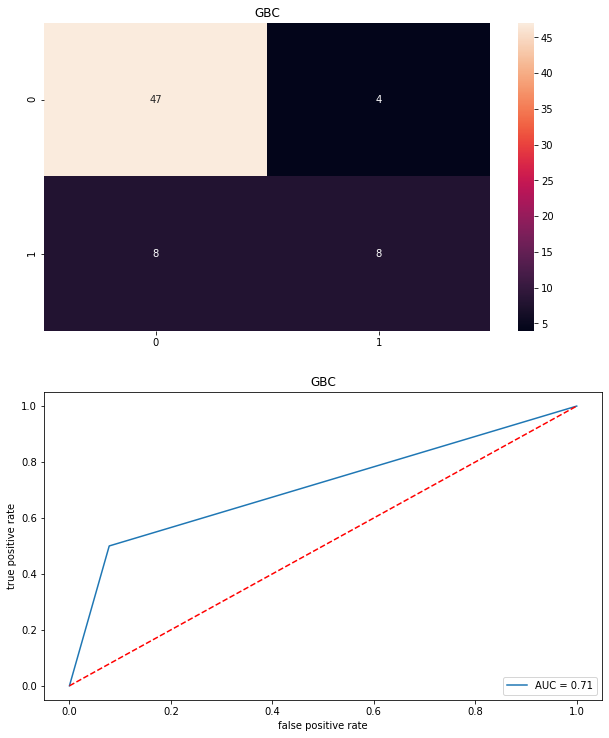

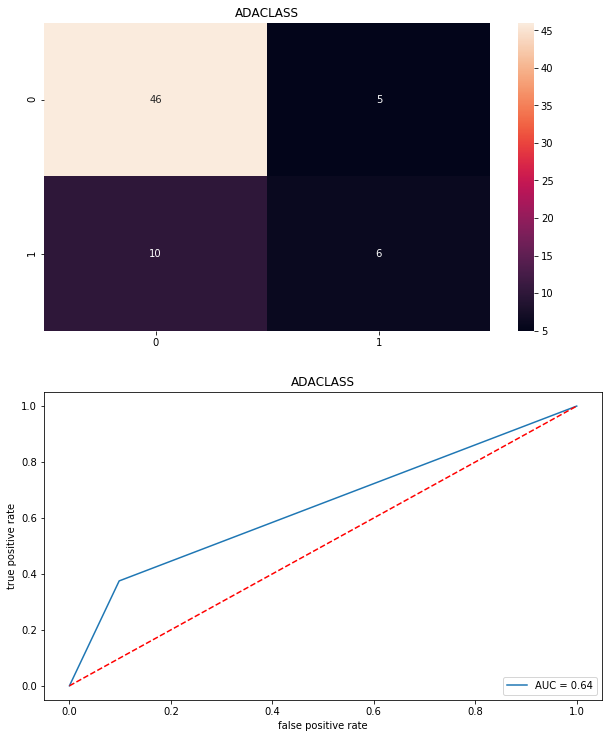

In [107]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('****,name,****')
    print('\n')
    Model.append(name)
    model.fit(xtrain,ytrain)
    print(model)
    pre=model.predict(xtest)
    print('\n')
    AS=accuracy_score(ytest,pre)
    print('accuracy score',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,xd,yn,cv=5,scoring='accuracy').mean()
    print('Cross val score',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(ytest,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc score',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification report\n',classification_report(ytest,pre))
    print('\n')
    cm=confusion_matrix(ytest,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,60))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot( false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('true positive rate')
    plt.xlabel('false positive rate')
    print('\n\n')
    

In [108]:
result=pd.DataFrame({'Model':Model,'Accuracy_score': score,'Cross val score': cvs,'Roc_auc_curve':rocscore})
result

Model  Accuracy_score  Cross val score  Roc_auc_curve
0                   GNB       73.134328        77.910448      56.617647
1                   SVC       76.119403        75.522388      50.000000
2    LogisticRegression       74.626866        79.701493      61.887255
3                   DTC       80.597015        77.910448      74.387255
4  kNeighborsClassifier       74.626866        75.820896      49.019608
5                   RFC       80.597015        80.298507      61.519608
6                   GBC       82.089552        84.477612      71.078431
7              ADACLASS       77.611940        79.701493      63.848039

# After having tried all the above models , GBC is working best¶
Also, random state corresponding to max acc score in GBC is 63

In [109]:
xtrain,xtest,ytrain,ytest=train_test_split(xd,yn,test_size=.20,random_state=63)
gbc=GradientBoostingClassifier(learning_rate=0.1,n_estimators=150)
gbc.fit(xtrain,ytrain)
ypred=gbc.predict(xtest)

# Final model is as follows

In [110]:
print('accuracy score of GBC is',accuracy_score(ytest,ypred))
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))
print('\n')

accuracy score of SVC is 0.8805970149253731
[[54  3]
 [ 5  5]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        57
           1       0.62      0.50      0.56        10

    accuracy                           0.88        67
   macro avg       0.77      0.72      0.74        67
weighted avg       0.87      0.88      0.87        67





roc_auc score 0.7236842105263158





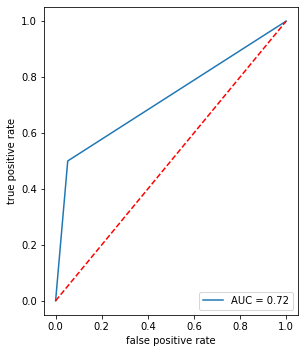

In [111]:
false_positive_rate,true_positive_rate,thresholds=roc_curve(ytest,ypred)
roc_auc=auc(false_positive_rate,true_positive_rate)
print('roc_auc score',roc_auc)
plt.figure(figsize=(10,60))
plt.subplot(922)
plt.plot( false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('true positive rate')
plt.xlabel('false positive rate')
print('\n\n')
    